In [2]:
import pandas as pd
import numpy as np

In [33]:
df = pd.read_csv("../data/2020-03-13/preprocessed.csv", index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: '../data/2020-03-13/preprocessed.csv'

In [ ]:
df

In [4]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('msmarco-distilbert-base-dot-prod-v3')

In [5]:
import faiss
encoded_data = model.encode(df.abstract_tokens.tolist()[0:10])
index = faiss.IndexIDMap(faiss.IndexFlatIP(768))
index.add_with_ids(encoded_data, np.array(range(0, len(encoded_data))))
faiss.write_index(index, 'paper.index')

In [6]:
def fetch_paper_info(dataframe_idx):
    info = df.iloc[dataframe_idx]
    meta_dict = dict()
    meta_dict['title'] = info['title']
    # meta_dict['Plot'] = info['Plot'][:500]
    return meta_dict
    
def search(query, top_k, index, model):
    t = time.time()
    query_vector = model.encode([query])
    top_k = index.search(query_vector, top_k)
    print('>>>> Results in Total Time: {}'.format(time.time()-t))
    top_k_ids = top_k[1].tolist()[0]
    top_k_ids = list(np.unique(top_k_ids))
    results =  [fetch_paper_info(idx) for idx in top_k_ids]
    return results

In [ ]:
import time
from pprint import pprint
query = "What is the incubation time of covid?"
results = search(query, top_k=5, index=index, model=model)
print("\n")
for result in results:
    print('\t', result)

In [5]:
df

sha  \
2      210a892deb1c61577f6fba58505fd65356ce6636   
3      e3b40cc8e0e137c416b4a2273a4dca94ae8178cc   
5      0df0d5270a9399cf4e23c0cdd877a80616a9725e   
6      f24242580be243d5fc3f432915d86af6854bb8b7   
8      e1b336d8be1a4c0ccc5a1bf41e48b3b004d3ece1   
...                                         ...   
29495  c42a617a00afe6a36bde0a8e3638e0f55bfee4f7   
29496  c4ce14ce42fa4360dfe3515ec9d1584847381c27   
29497  c41e09a32be90c84cea0616bb1c726aecba721e0   
29498  ca88735399ff43d0e673876200655099f06f5567   
29499  0b48e1bfcdff9a42c88cc80a98661feb2703390d   

                                                   title  \
2      Incubation Period and Other Epidemiological Ch...   
3      Characteristics of and Public Health Responses...   
5      An updated estimation of the risk of transmiss...   
6      Real-time forecasts of the 2019-nCoV epidemic ...   
8      COVID-19 outbreak on the Diamond Princess crui...   
...                                                  ...   
29495  Prediction of COVID-19 Spreading Profiles in S...   
29496  A deterministic epidemic model for the emergen...   
29497  Data-driven discovery of clinical routes for s...   
29498  Ascertainment rate of novel coronavirus diseas...   
29499  Aerosol and surface stability of HCoV-19 (SARS...   

                                                abstract  \
2      The geographic spread of 2019 novel coronaviru...   
3      In December 2019, cases of unidentified pneumo...   
5      The basic reproduction number of an infectious...   
6      The initial cluster of severe pneumonia cases ...   
8      Cruise ships carry a large number of people in...   
...                                                  ...   
29495  This work applies a data-driven coding method ...   
29496  Coronavirus disease (COVID-19) broke out in Wu...   
29497  The outbreak of COVID-19 epidemic has caused w...   
29498  We analyzed the epidemiological dataset of con...   
29499  A novel human coronavirus, now named severe ac...   

                                         abstract_tokens  
2      ['The', 'geographic', 'spread', 'of', '2019', ...  
3      ['In', 'December', '2019', ',', 'cases', 'of',...  
5      ['The', 'basic', 'reproduction', 'number', 'of...  
6      ['The', 'initial', 'cluster', 'of', 'severe', ...  
8      ['Cruise', 'ships', 'carry', 'a', 'large', 'nu...  
...                                                  ...  
29495  ['This', 'work', 'applies', 'a', 'data-driven'...  
29496  ['Coronavirus', 'disease', '(', 'COVID-19', ')...  
29497  ['The', 'outbreak', 'of', 'COVID-19', 'epidemi...  
29498  ['We', 'analyzed', 'the', 'epidemiological', '...  
29499  ['A', 'novel', 'human', 'coronavirus', ',', 'n...  

[26909 rows x 4 columns]

In [6]:
df.set_index('sha').to_dict(orient='index')

ValueError: DataFrame index must be unique for orient='index'.

In [12]:
df['sha'].is_unique

False

In [14]:
df[df.duplicated()]

sha  \
1043                                        NaN   
1044                                        NaN   
1212                                        NaN   
10580  a7fa0fb652d9df8708a8fb3871c570a4b7c49fc2   
12912  c9fee561c2a3834645dbb61dc4ae6448051da492   
12926  fd28e6d03eef27b0454f13ca539dc1498242a4c2   
15428  ad8c7c22faa32a928133bfeb767353400262040c   
15627  e918fa86b48ad310a58f1c7aa0ba307fa97c66e9   
17566                                       NaN   
21198                                       NaN   
21326                                       NaN   
25705                                       NaN   

                                                   title  \
1043   Emergency management of prevention and control...   
1044   Psychological intervention in oral patients in...   
1212   The prevention and control of a new coronaviru...   
10580  A novel framework for inferring parameters of ...   
12912  Comprehensive Genomic Characterization Analysi...   
12926  A rapid advice guideline for the diagnosis and...   
15428  Understanding perceptions of global healthcare...   
15627  Rapid Response Systems Reduce In-Hospital Card...   
17566  Chinese expert consensus on the perinatal and ...   
21198  Effectiveness of Border Screening for Detectin...   
21326  RACE, GENDER AND TOTAL KNEE REPLACEMENT CONSID...   
25705  Impact of a Spreading Epidemic on Medical Stud...   

                                                abstract  \
1043   Complying with overall requirements of the gov...   
1044   Public health emergencies have an impact on th...   
1212   During a short period of time, the outbreak of...   
10580  Transmission between hosts is a critical part ...   
12912  Porcine delta coronavirus (PDCoV) is a novel e...   
12926  In December 2019, a new type viral pneumonia c...   
15428  OBJECTIVES: The study aimed to qualitatively e...   
15627  BACKGROUND: Early recognition of the signs and...   
17566  Since December 2019, there has been an outbrea...   
21198  Objectives. We measured symptom and influenza ...   
21326  OBJECTIVE: To determine whether there are raci...   
25705  The emergence of severe acute respiratory synd...   

                                         abstract_tokens  
1043   ['Complying', 'with', 'overall', 'requirements...  
1044   ['Public', 'health', 'emergencies', 'have', 'a...  
1212   ['During', 'a', 'short', 'period', 'of', 'time...  
10580  ['Transmission', 'between', 'hosts', 'is', 'a'...  
12912  ['Porcine', 'delta', 'coronavirus', '(', 'PDCo...  
12926  ['In', 'December', '2019', ',', 'a', 'new', 't...  
15428  ['OBJECTIVES', ':', 'The', 'study', 'aimed', '...  
15627  ['BACKGROUND', ':', 'Early', 'recognition', 'o...  
17566  ['Since', 'December', '2019', ',', 'there', 'h...  
21198  ['Objectives', '.', 'We', 'measured', 'symptom...  
21326  ['OBJECTIVE', ':', 'To', 'determine', 'whether...  
25705  ['The', 'emergence', 'of', 'severe', 'acute', ...

In [16]:
df = df.dropna(subset=["sha"])
df = df.drop_duplicates(subset=["sha"])

In [28]:
df.to_dict('records')

[{'sha': '210a892deb1c61577f6fba58505fd65356ce6636',
  'title': 'Incubation Period and Other Epidemiological Characteristics of 2019 Novel Coronavirus Infections with Right Truncation: A Statistical Analysis of Publicly Available Case Data',
  'abstract': 'The geographic spread of 2019 novel coronavirus (COVID-19) infections from the epicenter of Wuhan, China, has provided an opportunity to study the natural history of the recently emerged virus. Using publicly available event-date data from the ongoing epidemic, the present study investigated the incubation period and other time intervals that govern the epidemiological dynamics of COVID-19 infections. Our results show that the incubation period falls within the range of 2&ndash;14 days with 95% confidence and has a mean of around 5 days when approximated using the best-fit lognormal distribution. The mean time from illness onset to hospital admission (for treatment and/or isolation) was estimated at 3&ndash;4 days without truncation 

In [23]:
full_data['e918fa86b48ad310a58f1c7aa0ba307fa97c66e9']

{'title': 'Rapid Response Systems Reduce In-Hospital Cardiopulmonary Arrest: A Pilot Study and Motivation for a Nationwide Survey',
 'abstract': 'BACKGROUND: Early recognition of the signs and symptoms of clinical deterioration could diminish the incidence of cardiopulmonary arrest. The present study investigates outcomes with respect to cardiopulmonary arrest rates in institutions with and without rapid response systems (RRSs) and the current level of cardiopulmonary arrest rate in tertiary hospitals. METHODS: This was a retrospective study based on data from 14 tertiary hospitals. Cardiopulmonary resuscitation (CPR) rate reports were obtained from each hospital to include the number of cardiopulmonary arrest events in adult patients in the general ward, the annual adult admission statistics, and the structure of the RRS if present. RESULTS: Hospitals with RRSs showed a statistically significant reduction of the CPR rate between 2013 and 2015 (odds ratio [OR], 0.731; 95% confidence in

In [29]:
from torch.utils.data import Dataset

class CORDDataset(Dataset):
    """ CORD dataset."""

    def __init__(self, df):
        self.data = df.to_dict('records')

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [30]:
cord_dataset = CORDDataset(df)

In [32]:
cord_dataset[100]

{'sha': '2d1374051e0b6d5b8a3f42c4906e0a56ea1d5b9d',
 'title': 'Uncertainties about the transmission routes of 2019 novel coronavirus',
 'abstract': 'The 2019 novel coronavirus (now named as SARS‐CoV‐2) caused an outbreak of SARS‐like illness in the late of December 2019. At present, the origin, susceptible population, and infection sources already have been clear.1, 2 However, the transmission routes, a key step to the epidemic control, have not yet been fully ascertained. Here, we focus on the potential transmission routes that have been investigated in the SARS‐CoV‐2 epidemic recently. SARS‐CoV‐2, similar to SARS and MERS, is predominantly spread via respiratory tract with high infectivity. It is commonly recognized that droplet transmission is the main route. Spread by aerosol is suspected to be another important route of transmission but unestablished now. Epidemiological experts, as well as the WHO, consider more evidence is needed to confirm.3 Besides, there are other routes exce

In [34]:
df

sha  \
2      210a892deb1c61577f6fba58505fd65356ce6636   
3      e3b40cc8e0e137c416b4a2273a4dca94ae8178cc   
5      0df0d5270a9399cf4e23c0cdd877a80616a9725e   
6      f24242580be243d5fc3f432915d86af6854bb8b7   
8      e1b336d8be1a4c0ccc5a1bf41e48b3b004d3ece1   
...                                         ...   
29495  c42a617a00afe6a36bde0a8e3638e0f55bfee4f7   
29496  c4ce14ce42fa4360dfe3515ec9d1584847381c27   
29497  c41e09a32be90c84cea0616bb1c726aecba721e0   
29498  ca88735399ff43d0e673876200655099f06f5567   
29499  0b48e1bfcdff9a42c88cc80a98661feb2703390d   

                                                   title  \
2      Incubation Period and Other Epidemiological Ch...   
3      Characteristics of and Public Health Responses...   
5      An updated estimation of the risk of transmiss...   
6      Real-time forecasts of the 2019-nCoV epidemic ...   
8      COVID-19 outbreak on the Diamond Princess crui...   
...                                                  ...   
29495  Prediction of COVID-19 Spreading Profiles in S...   
29496  A deterministic epidemic model for the emergen...   
29497  Data-driven discovery of clinical routes for s...   
29498  Ascertainment rate of novel coronavirus diseas...   
29499  Aerosol and surface stability of HCoV-19 (SARS...   

                                                abstract  \
2      The geographic spread of 2019 novel coronaviru...   
3      In December 2019, cases of unidentified pneumo...   
5      The basic reproduction number of an infectious...   
6      The initial cluster of severe pneumonia cases ...   
8      Cruise ships carry a large number of people in...   
...                                                  ...   
29495  This work applies a data-driven coding method ...   
29496  Coronavirus disease (COVID-19) broke out in Wu...   
29497  The outbreak of COVID-19 epidemic has caused w...   
29498  We analyzed the epidemiological dataset of con...   
29499  A novel human coronavirus, now named severe ac...   

                                         abstract_tokens  
2      ['The', 'geographic', 'spread', 'of', '2019', ...  
3      ['In', 'December', '2019', ',', 'cases', 'of',...  
5      ['The', 'basic', 'reproduction', 'number', 'of...  
6      ['The', 'initial', 'cluster', 'of', 'severe', ...  
8      ['Cruise', 'ships', 'carry', 'a', 'large', 'nu...  
...                                                  ...  
29495  ['This', 'work', 'applies', 'a', 'data-driven'...  
29496  ['Coronavirus', 'disease', '(', 'COVID-19', ')...  
29497  ['The', 'outbreak', 'of', 'COVID-19', 'epidemi...  
29498  ['We', 'analyzed', 'the', 'epidemiological', '...  
29499  ['A', 'novel', 'human', 'coronavirus', ',', 'n...  

[16585 rows x 4 columns]

<AxesSubplot:>

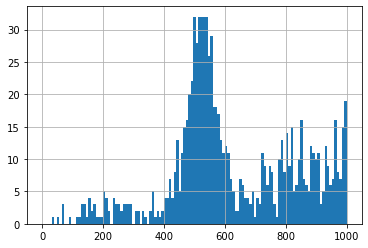

In [35]:
import math
w = 200
n = math.ceil(25000/w)
df['abstract_tokens'].map(lambda x: len(x)).hist(bins=n, range=(0, 1000))